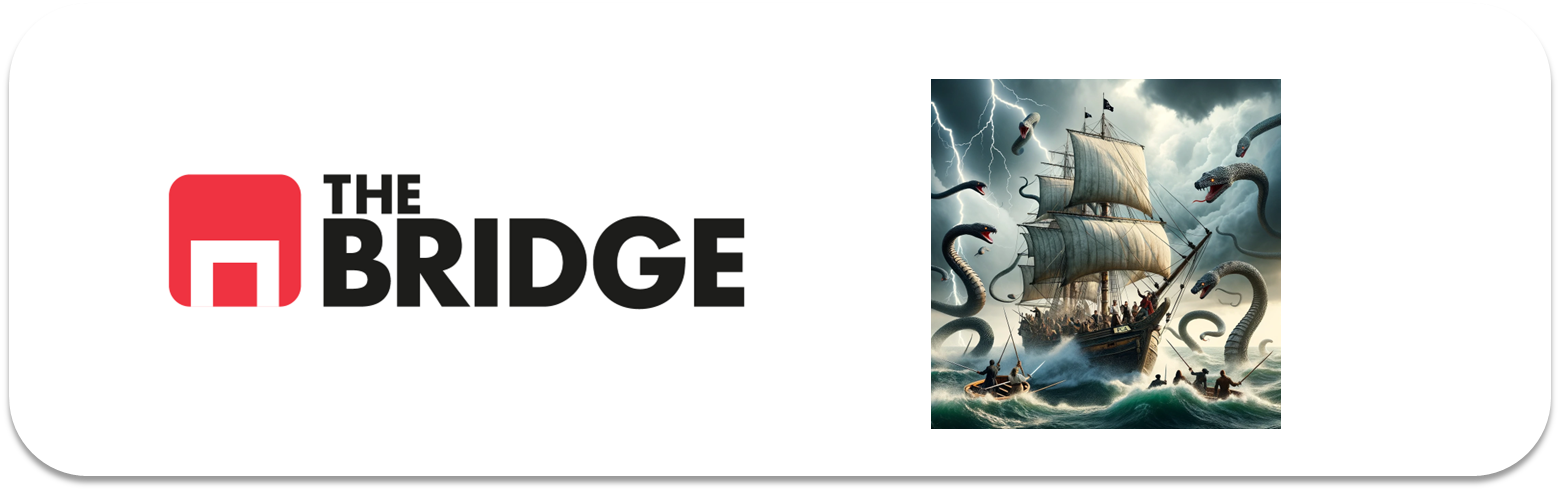

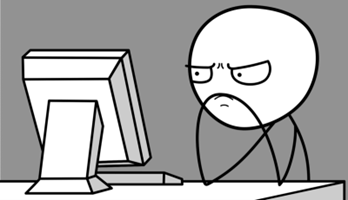

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA

from toolbox_DS import *

pd.set_option('mode.use_inf_as_na', True)

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_15872\2696566444.py:16: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [6]:
df = pd.read_csv('./data/nutrition.csv', index_col=0)
df.head(8)


,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,...,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,...,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,...,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FoodGroup         8618 non-null   object 
 1   ShortDescrip      8618 non-null   object 
 2   Descrip           8618 non-null   object 
 3   CommonName        1063 non-null   object 
 4   MfgName           1560 non-null   object 
 5   ScientificName    732 non-null    object 
 6   Energy_kcal       8618 non-null   float64
 7   Protein_g         8618 non-null   float64
 8   Fat_g             8618 non-null   float64
 9   Carb_g            8618 non-null   float64
 10  Sugar_g           8618 non-null   float64
 11  Fiber_g           8618 non-null   float64
 12  VitA_mcg          8618 non-null   float64
 13  VitB6_mg          8618 non-null   float64
 14  VitB12_mcg        8618 non-null   float64
 15  VitC_mg           8618 non-null   float64
 16  VitE_mg           8618 non-null   float64
 

### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [8]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix.round(2)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
Energy_kcal,1.00,0.11,0.81,0.49,0.31,0.20,0.03,0.12,-0.01,-0.03,...,0.15,0.17,0.16,0.19,0.12,0.10,0.26,0.20,0.06,0.11
Protein_g,0.11,1.00,0.05,-0.30,-0.27,-0.07,0.03,0.23,0.25,-0.07,...,0.01,0.38,0.20,0.10,0.05,0.16,0.22,0.44,0.38,0.42
Fat_g,0.81,0.05,1.00,-0.05,-0.00,-0.03,0.02,-0.05,-0.02,-0.06,...,-0.06,-0.02,-0.04,-0.01,0.02,0.04,0.07,0.07,0.04,0.03
Carb_g,0.49,-0.30,-0.05,1.00,0.62,0.46,0.00,0.20,-0.09,0.08,...,0.33,0.17,0.23,0.28,0.19,0.06,0.29,0.07,-0.11,-0.01
Sugar_g,0.31,-0.27,-0.00,0.62,1.00,0.12,0.01,0.09,-0.05,0.06,...,0.16,0.03,0.13,0.10,0.13,-0.01,0.04,-0.05,-0.12,-0.02
Fiber_g,0.20,-0.07,-0.03,0.46,0.12,1.00,0.01,0.24,-0.05,0.08,...,0.25,0.14,0.16,0.21,0.23,0.19,0.54,0.16,-0.04,0.09
VitA_mcg,0.03,0.03,0.02,0.00,0.01,0.01,1.00,0.14,0.58,0.11,...,0.11,0.15,0.33,0.05,0.03,0.57,0.02,0.06,0.05,0.07
VitB6_mg,0.12,0.23,-0.05,0.20,0.09,0.24,0.14,1.00,0.26,0.27,...,0.55,0.71,0.58,0.42,0.18,0.12,0.29,0.21,0.11,0.45
VitB12_mcg,-0.01,0.25,-0.02,-0.09,-0.05,-0.05,0.58,0.26,1.00,0.01,...,0.16,0.28,0.44,0.10,0.01,0.57,0.00,0.15,0.22,0.30
VitC_mg,-0.03,-0.07,-0.06,0.08,0.06,0.08,0.11,0.27,0.01,1.00,...,0.07,0.21,0.23,0.06,0.11,0.03,0.12,0.01,-0.04,0.02


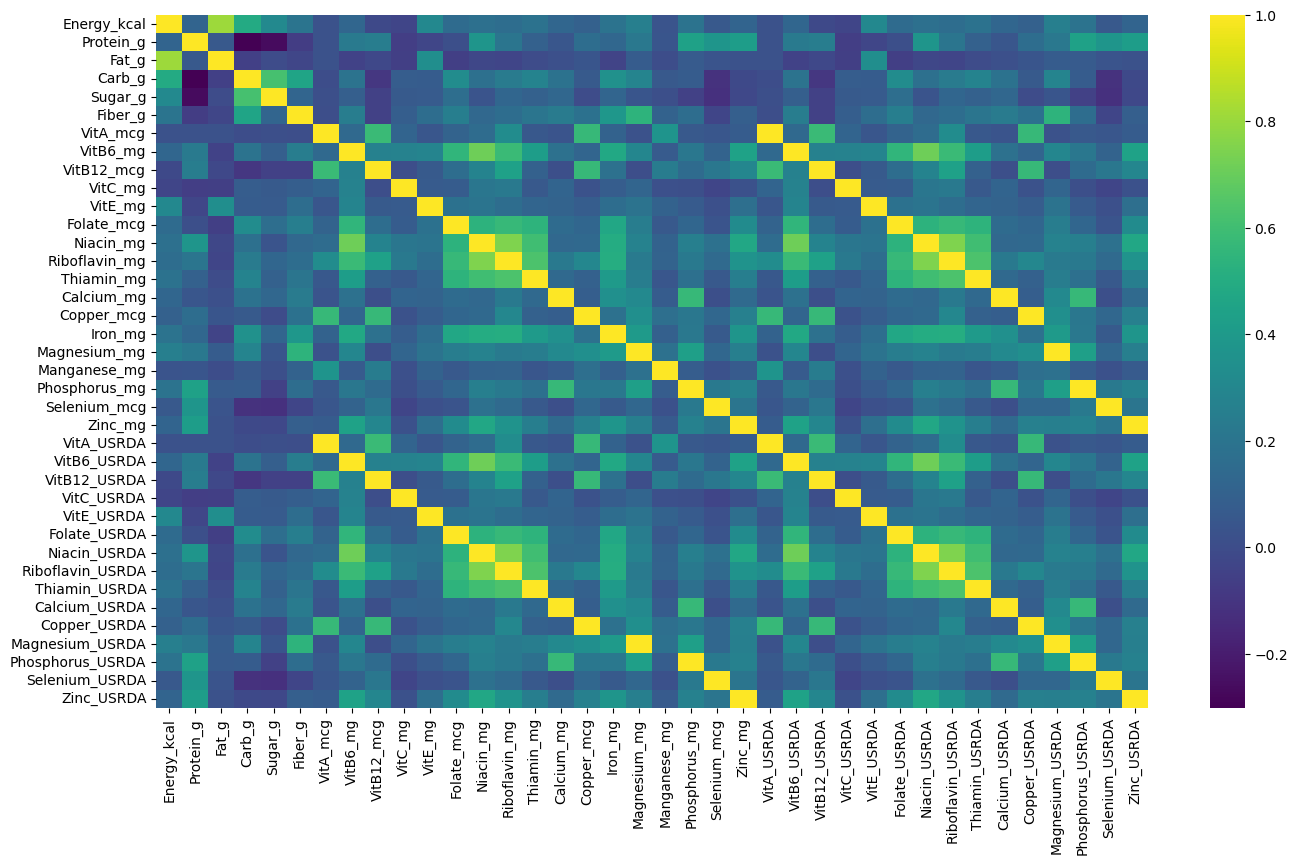

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(data=corr_matrix, cmap='viridis');

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

Tienen una correlación del 100% con las que acaban en 'mg'

In [10]:
df.columns

Index(['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [11]:
df_copy = df.drop(columns=['VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'])

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FoodGroup       8618 non-null   object 
 1   ShortDescrip    8618 non-null   object 
 2   Descrip         8618 non-null   object 
 3   CommonName      1063 non-null   object 
 4   MfgName         1560 non-null   object 
 5   ScientificName  732 non-null    object 
 6   Energy_kcal     8618 non-null   float64
 7   Protein_g       8618 non-null   float64
 8   Fat_g           8618 non-null   float64
 9   Carb_g          8618 non-null   float64
 10  Sugar_g         8618 non-null   float64
 11  Fiber_g         8618 non-null   float64
 12  VitA_mcg        8618 non-null   float64
 13  VitB6_mg        8618 non-null   float64
 14  VitB12_mcg      8618 non-null   float64
 15  VitC_mg         8618 non-null   float64
 16  VitE_mg         8618 non-null   float64
 17  Folate_mcg      8618 non-null   fl

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [12]:
df_copy = df_copy.drop(columns=['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName','ScientificName'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesium

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


In [13]:
df_copy.describe().round(2)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,...,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00
mean,226.44,11.52,10.65,21.82,6.56,2.02,93.97,0.26,1.23,7.93,...,0.24,0.21,73.41,0.17,2.70,32.75,0.50,155.99,12.61,1.97
std,169.39,10.55,15.87,27.24,13.60,4.31,779.36,0.48,4.32,57.58,...,0.45,0.52,201.36,0.55,5.73,56.07,6.38,203.09,28.29,3.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,93.00,2.47,0.99,0.04,0.00,0.00,0.00,0.03,0.00,0.00,...,0.05,0.03,9.00,0.03,0.53,10.00,0.00,37.00,0.10,0.23
50%,191.00,8.28,5.24,8.94,0.37,0.30,1.50,0.12,0.08,0.00,...,0.15,0.08,19.00,0.08,1.33,20.00,0.02,133.00,3.90,0.84
75%,336.00,19.98,13.90,32.90,5.30,2.40,21.00,0.36,1.30,2.50,...,0.26,0.22,62.00,0.14,2.58,29.00,0.22,216.00,21.30,2.70
max,902.00,88.32,100.00,100.00,99.80,79.00,30000.00,12.00,98.89,2400.00,...,17.50,23.38,7364.00,15.05,123.60,781.00,328.00,9918.00,1917.00,90.95


In [14]:
# sns.pairplot(df_copy);

In [15]:
features_num = df_copy.columns

Para Energy_kcal
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


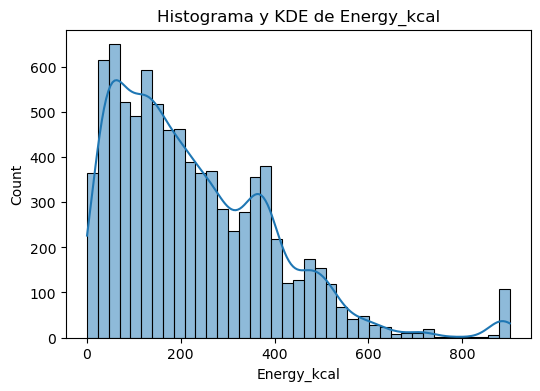

count    8618.00
mean      226.44
std       169.39
min         0.00
25%        93.00
50%       191.00
75%       336.00
max       902.00
Name: Energy_kcal, dtype: float64

La moda es 884.00, el coeficiente de variación es 74.81% y el IQR es 243.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.17, valores extendidos a la derecha

Curtosis: 1.79. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=158.93

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

La variable Energy_kcal puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=1.79, asimetria=1.17,outliers_sup.=0.0,outliers_inf=0.0 JB p-value=0.0000
Para Protein_g
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


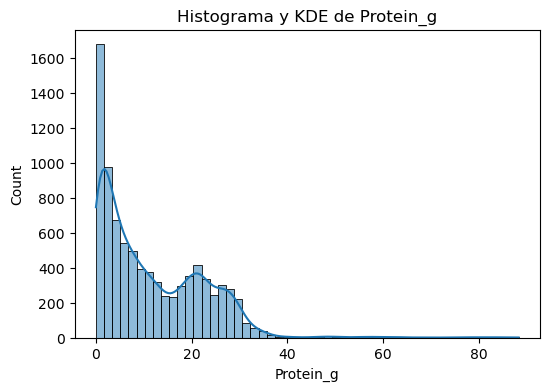

count    8618.00
mean       11.52
std        10.55
min         0.00
25%         2.47
50%         8.28
75%        19.98
max        88.32
Name: Protein_g, dtype: float64

La moda es 0.00, el coeficiente de variación es 91.55% y el IQR es 17.51

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.17, valores extendidos a la derecha

Curtosis: 2.74. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=273.29

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 12 y suponen en proporción 0.14%

La variable Protein_g puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=2.74, asimetria=1.17,outliers_sup.=0.14,outliers_inf=0.0 JB p-value=0.0000
Para Fat_g
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


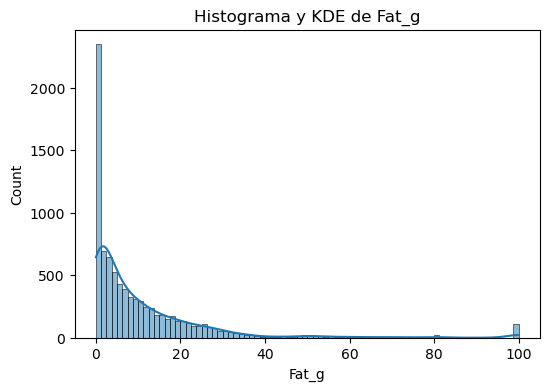

count    8618.00
mean       10.65
std        15.87
min         0.00
25%         0.99
50%         5.24
75%        13.90
max       100.00
Name: Fat_g, dtype: float64

La moda es 0.00, el coeficiente de variación es 149.02% y el IQR es 12.91

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 3.31, valores extendidos a la derecha

Curtosis: 13.73. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=797.36

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 246 y suponen en proporción 2.85%

La variable Fat_g puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=13.73, asimetria=3.31,outliers_sup.=2.85,outliers_inf=0.0 JB p-value=0.0000
Para Carb_g
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


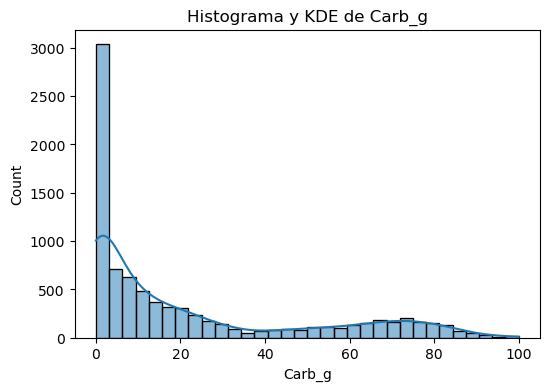

count    8618.00
mean       21.82
std        27.24
min         0.00
25%         0.04
50%         8.94
75%        32.90
max       100.00
Name: Carb_g, dtype: float64

La moda es 0.00, el coeficiente de variación es 124.84% y el IQR es 32.86

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.16, valores extendidos a la derecha

Curtosis: -0.09. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=772.31

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

La variable Carb_g puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=-0.09, asimetria=1.16,outliers_sup.=0.0,outliers_inf=0.0 JB p-value=0.0000
Para Sugar_g
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


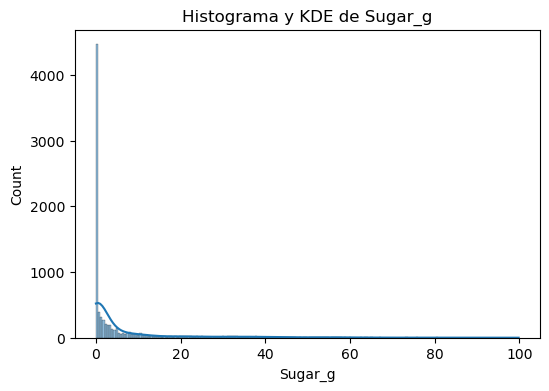

count    8618.00
mean        6.56
std        13.60
min         0.00
25%         0.00
50%         0.37
75%         5.30
max        99.80
Name: Sugar_g, dtype: float64

La moda es 0.00, el coeficiente de variación es 207.34% y el IQR es 5.30

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.95, valores extendidos a la derecha

Curtosis: 9.66. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1482.94

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 950 y suponen en proporción 11.02%

La variable Sugar_g puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=9.66, asimetria=2.95,outliers_sup.=11.02,outliers_inf=0.0 JB p-value=0.0000
Para Fiber_g
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


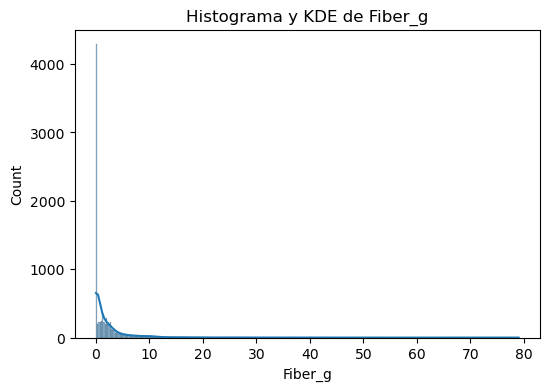

count    8618.00
mean        2.02
std         4.31
min         0.00
25%         0.00
50%         0.30
75%         2.40
max        79.00
Name: Fiber_g, dtype: float64

La moda es 0.00, el coeficiente de variación es 213.21% y el IQR es 2.40

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 5.79, valores extendidos a la derecha

Curtosis: 56.38. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1226.01

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 387 y suponen en proporción 4.49%

La variable Fiber_g puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=56.38, asimetria=5.79,outliers_sup.=4.49,outliers_inf=0.0 JB p-value=0.0000
Para VitA_mcg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


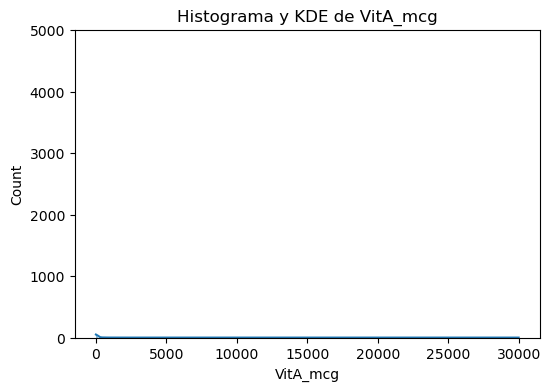

count     8618.00
mean        93.97
std        779.36
min          0.00
25%          0.00
50%          1.50
75%         21.00
max      30000.00
Name: VitA_mcg, dtype: float64

La moda es 0.00, el coeficiente de variación es 829.38% y el IQR es 21.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 24.09, valores extendidos a la derecha

Curtosis: 716.93. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=2696.32

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1038 y suponen en proporción 12.04%

La variable VitA_mcg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=716.93, asimetria=24.09,outliers_sup.=12.04,outliers_inf=0.0 JB p-value=0.0000
Para VitB6_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


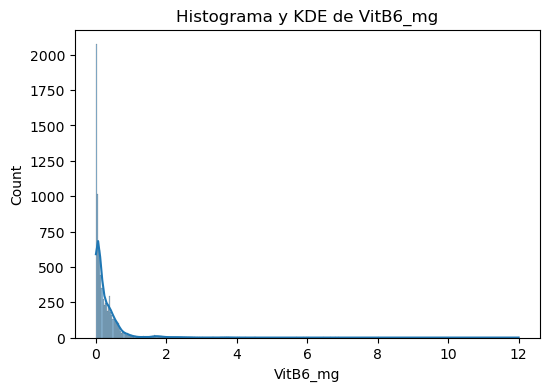

count    8618.00
mean        0.26
std         0.48
min         0.00
25%         0.03
50%         0.12
75%         0.36
max        12.00
Name: VitB6_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 181.04% y el IQR es 0.32

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 7.56, valores extendidos a la derecha

Curtosis: 101.62. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=993.52

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 240 y suponen en proporción 2.78%

La variable VitB6_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=101.62, asimetria=7.56,outliers_sup.=2.78,outliers_inf=0.0 JB p-value=0.0000
Para VitB12_mcg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


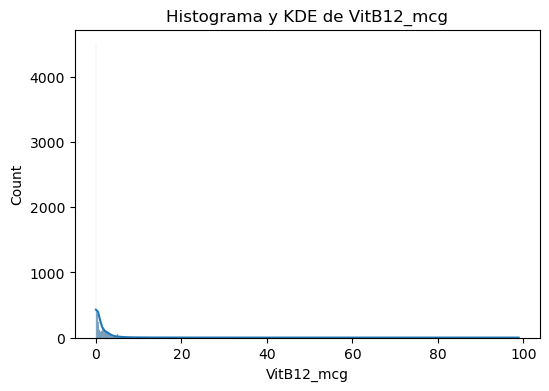

count    8618.00
mean        1.23
std         4.32
min         0.00
25%         0.00
50%         0.08
75%         1.30
max        98.89
Name: VitB12_mcg, dtype: float64

La moda es 0.00, el coeficiente de variación es 352.51% y el IQR es 1.30

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 13.03, valores extendidos a la derecha

Curtosis: 221.58. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1791.74

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 348 y suponen en proporción 4.04%

La variable VitB12_mcg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=221.58, asimetria=13.03,outliers_sup.=4.04,outliers_inf=0.0 JB p-value=0.0000
Para VitC_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


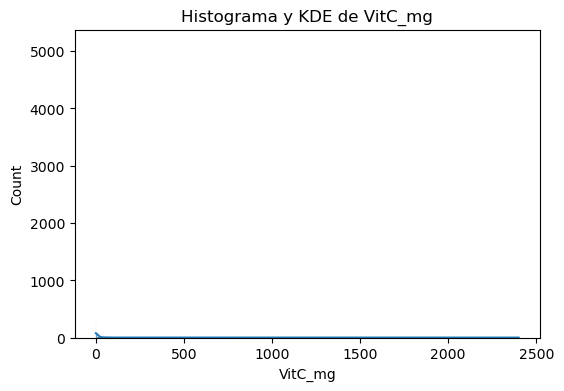

count    8618.00
mean        7.93
std        57.58
min         0.00
25%         0.00
50%         0.00
75%         2.50
max      2400.00
Name: VitC_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 726.56% y el IQR es 2.50

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 30.90, valores extendidos a la derecha

Curtosis: 1114.65. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=2462.27

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1279 y suponen en proporción 14.84%

La variable VitC_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=1114.65, asimetria=30.9,outliers_sup.=14.84,outliers_inf=0.0 JB p-value=0.0000
Para VitE_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


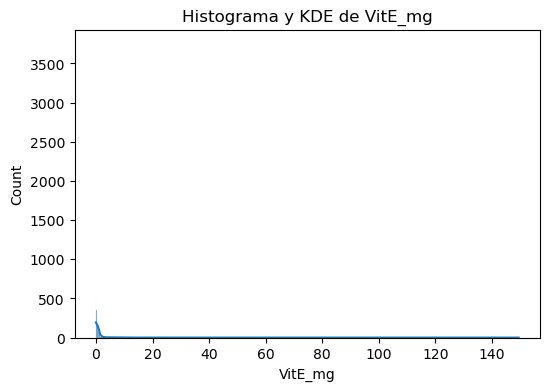

count    8618.00
mean        0.87
std         3.85
min         0.00
25%         0.00
50%         0.11
75%         0.45
max       149.40
Name: VitE_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 441.24% y el IQR es 0.45

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 13.85, valores extendidos a la derecha

Curtosis: 337.91. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=2287.32

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 681 y suponen en proporción 7.9%

La variable VitE_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=337.91, asimetria=13.85,outliers_sup.=7.9,outliers_inf=0.0 JB p-value=0.0000
Para Folate_mcg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


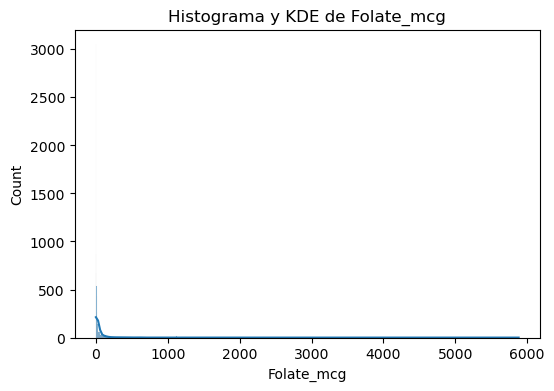

count    8618.00
mean       50.31
std       186.56
min         0.00
25%         0.00
50%         7.00
75%        25.00
max      5881.00
Name: Folate_mcg, dtype: float64

La moda es 0.00, el coeficiente de variación es 370.85% y el IQR es 25.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 10.33, valores extendidos a la derecha

Curtosis: 176.67. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=2100.39

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 883 y suponen en proporción 10.25%

La variable Folate_mcg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=176.67, asimetria=10.33,outliers_sup.=10.25,outliers_inf=0.0 JB p-value=0.0000
Para Niacin_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


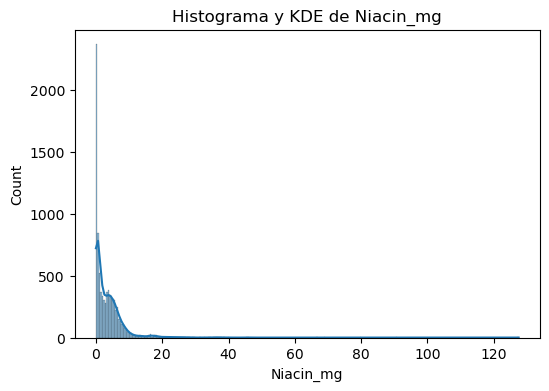

count    8618.00
mean        3.41
std         4.83
min         0.00
25%         0.38
50%         2.10
75%         5.03
max       127.50
Name: Niacin_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 141.71% y el IQR es 4.65

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 6.43, valores extendidos a la derecha

Curtosis: 96.41. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=592.94

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 106 y suponen en proporción 1.23%

La variable Niacin_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=96.41, asimetria=6.43,outliers_sup.=1.23,outliers_inf=0.0 JB p-value=0.0000
Para Riboflavin_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


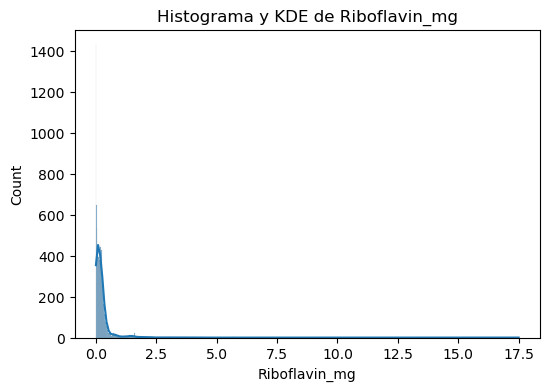

count    8618.00
mean        0.24
std         0.45
min         0.00
25%         0.05
50%         0.15
75%         0.26
max        17.50
Name: Riboflavin_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 189.62% y el IQR es 0.21

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 11.31, valores extendidos a la derecha

Curtosis: 292.76. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1257.79

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 354 y suponen en proporción 4.11%

La variable Riboflavin_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=292.76, asimetria=11.31,outliers_sup.=4.11,outliers_inf=0.0 JB p-value=0.0000
Para Thiamin_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


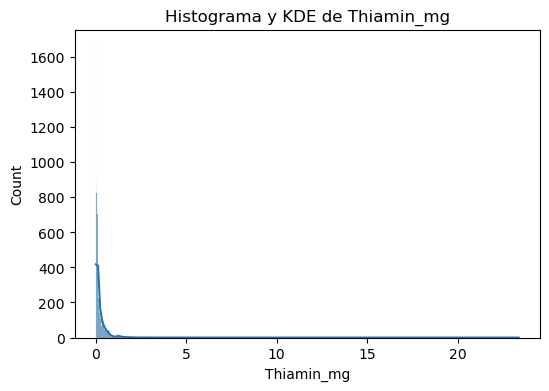

count    8618.00
mean        0.21
std         0.52
min         0.00
25%         0.03
50%         0.08
75%         0.22
max        23.38
Name: Thiamin_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 247.01% y el IQR es 0.19

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 17.51, valores extendidos a la derecha

Curtosis: 576.58. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1421.25

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 375 y suponen en proporción 4.35%

La variable Thiamin_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=576.58, asimetria=17.51,outliers_sup.=4.35,outliers_inf=0.0 JB p-value=0.0000
Para Calcium_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


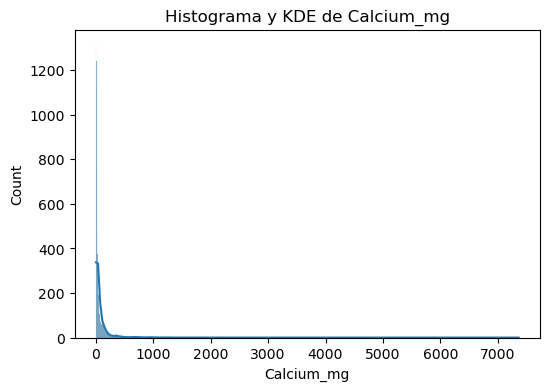

count    8618.00
mean       73.41
std       201.36
min         0.00
25%         9.00
50%        19.00
75%        62.00
max      7364.00
Name: Calcium_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 274.30% y el IQR es 53.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 13.43, valores extendidos a la derecha

Curtosis: 339.15. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1687.99

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 571 y suponen en proporción 6.63%

La variable Calcium_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=339.15, asimetria=13.43,outliers_sup.=6.63,outliers_inf=0.0 JB p-value=0.0000
Para Copper_mcg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


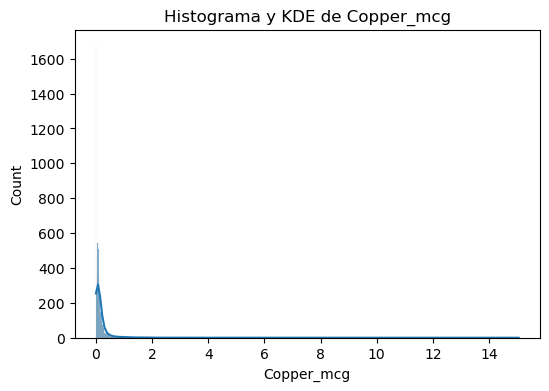

count    8618.00
mean        0.17
std         0.55
min         0.00
25%         0.03
50%         0.08
75%         0.14
max        15.05
Name: Copper_mcg, dtype: float64

La moda es 0.00, el coeficiente de variación es 321.20% y el IQR es 0.11

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 15.94, valores extendidos a la derecha

Curtosis: 345.05. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1884.36

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 509 y suponen en proporción 5.91%

La variable Copper_mcg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=345.05, asimetria=15.94,outliers_sup.=5.91,outliers_inf=0.0 JB p-value=0.0000
Para Iron_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


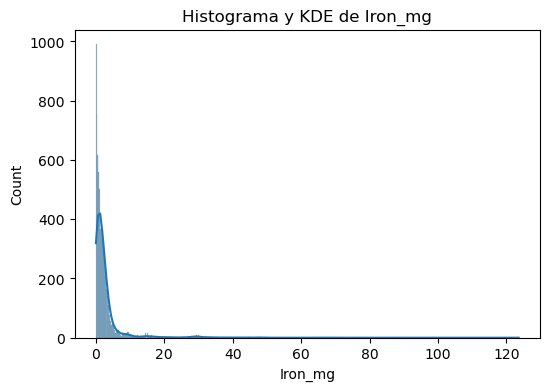

count    8618.00
mean        2.70
std         5.73
min         0.00
25%         0.53
50%         1.33
75%         2.58
max       123.60
Name: Iron_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 212.36% y el IQR es 2.05

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 6.84, valores extendidos a la derecha

Curtosis: 70.19. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1536.62

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 461 y suponen en proporción 5.35%

La variable Iron_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=70.19, asimetria=6.84,outliers_sup.=5.35,outliers_inf=0.0 JB p-value=0.0000
Para Magnesium_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


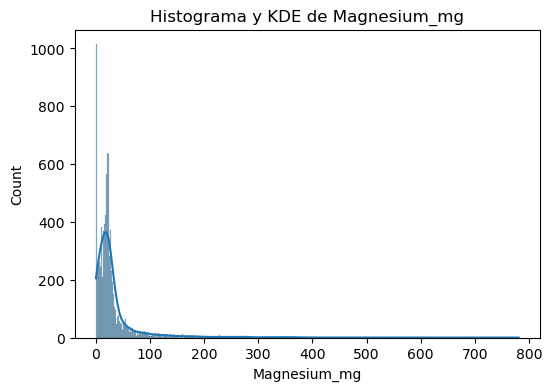

count    8618.00
mean       32.75
std        56.07
min         0.00
25%        10.00
50%        20.00
75%        29.00
max       781.00
Name: Magnesium_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 171.23% y el IQR es 19.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 5.56, valores extendidos a la derecha

Curtosis: 44.00. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=1304.74

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 636 y suponen en proporción 7.38%

La variable Magnesium_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=44.00, asimetria=5.56,outliers_sup.=7.38,outliers_inf=0.0 JB p-value=0.0000
Para Manganese_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


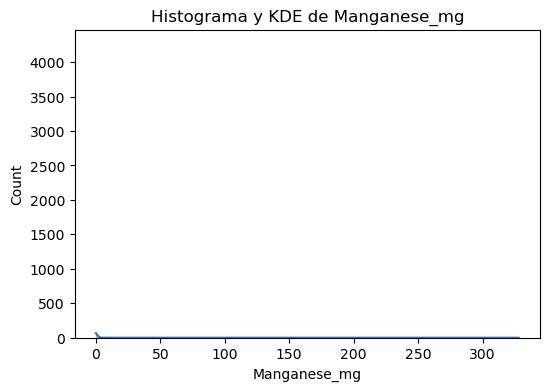

count    8618.00
mean        0.50
std         6.38
min         0.00
25%         0.00
50%         0.02
75%         0.22
max       328.00
Name: Manganese_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 1265.45% y el IQR es 0.22

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 39.73, valores extendidos a la derecha

Curtosis: 1785.22. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=2879.78

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 721 y suponen en proporción 8.37%

La variable Manganese_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=1785.22, asimetria=39.73,outliers_sup.=8.37,outliers_inf=0.0 JB p-value=0.0000
Para Phosphorus_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


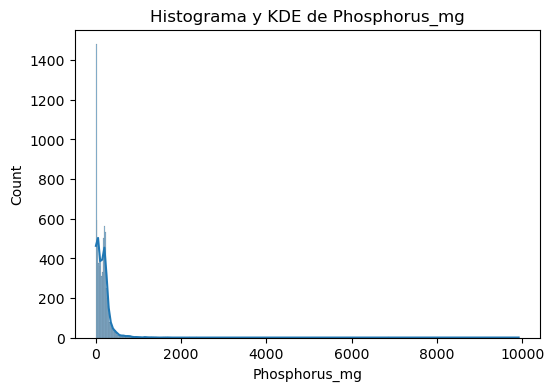

count    8618.00
mean      155.99
std       203.09
min         0.00
25%        37.00
50%       133.00
75%       216.00
max      9918.00
Name: Phosphorus_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 130.20% y el IQR es 179.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 18.55, valores extendidos a la derecha

Curtosis: 763.85. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=542.21

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 98 y suponen en proporción 1.14%

La variable Phosphorus_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=763.85, asimetria=18.55,outliers_sup.=1.14,outliers_inf=0.0 JB p-value=0.0000
Para Selenium_mcg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


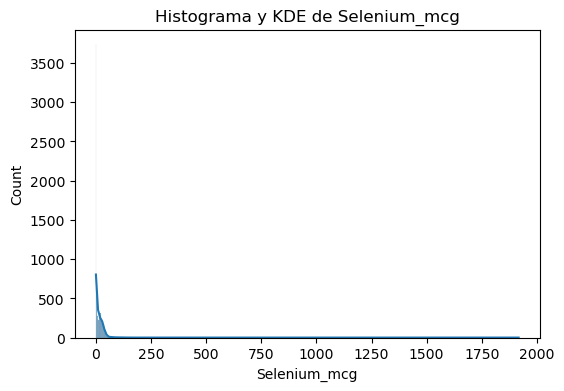

count    8618.00
mean       12.61
std        28.29
min         0.00
25%         0.10
50%         3.90
75%        21.30
max      1917.00
Name: Selenium_mcg, dtype: float64

La moda es 0.00, el coeficiente de variación es 224.28% y el IQR es 21.20

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 38.20, valores extendidos a la derecha

Curtosis: 2428.31. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=994.97

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 63 y suponen en proporción 0.73%

La variable Selenium_mcg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=2428.31, asimetria=38.2,outliers_sup.=0.73,outliers_inf=0.0 JB p-value=0.0000
Para Zinc_mg
*************************


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


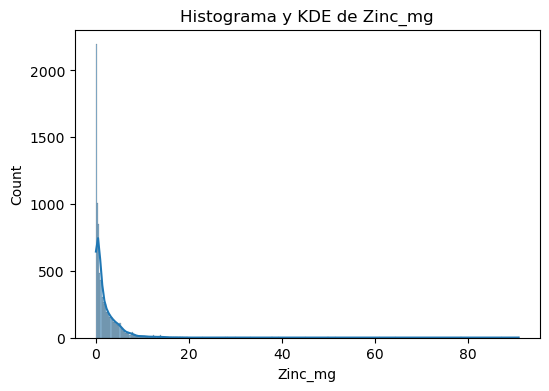

count    8618.00
mean        1.97
std         3.36
min         0.00
25%         0.23
50%         0.84
75%         2.70
max        90.95
Name: Zinc_mg, dtype: float64

La moda es 0.00, el coeficiente de variación es 170.45% y el IQR es 2.47

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 9.63, valores extendidos a la derecha

Curtosis: 185.84. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=843.21

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 165 y suponen en proporción 1.91%

La variable Zinc_mg puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=185.84, asimetria=9.63,outliers_sup.=1.91,outliers_inf=0.0 JB p-value=0.0000


c:\Users\Alfonso\OneDrive\Documentos_\Formación\Bootcamp_DS\Repo_DS\ONLINE_DS_THEBRIDGE_ALFONSO_NIETO\04_Machine_Learning\Sprint_16\Unidad_01\Ejercicios_Workout\toolbox_DS.py:188: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8618.
  shapiro_stat, shapiro_p_value = shapiro(df[col])


,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
Energy_kcal,0.0,0.0,158.93,1.17,1.79,0.0,0.00,True
Protein_g,0.0,0.0,273.29,1.17,2.74,0.0,0.14,True
Fat_g,0.0,0.0,797.36,3.31,13.73,0.0,2.85,True
Carb_g,0.0,0.0,772.31,1.16,-0.09,0.0,0.00,True
Sugar_g,0.0,0.0,1482.94,2.95,9.66,0.0,11.02,True
Fiber_g,0.0,0.0,1226.01,5.79,56.38,0.0,4.49,True
VitA_mcg,0.0,0.0,2696.32,24.09,716.93,0.0,12.04,True
VitB6_mg,0.0,0.0,993.52,7.56,101.62,0.0,2.78,True
VitB12_mcg,0.0,0.0,1791.74,13.03,221.58,0.0,4.04,True
VitC_mg,0.0,0.0,2462.27,30.90,1114.65,0.0,14.84,True


In [16]:
analisis_univariable_numericas(df_copy,features_num)

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [17]:
scaler = StandardScaler()
# Hago la transformación logarítmica de todas las variables
for feature in features_num:
    df_copy[f'log_{feature}'] = df_copy[feature].apply(lambda x: np.log if x<0 else np.log(x+1e-6))
    df_copy[f'log_{feature}'] = scaler.fit_transform(df_copy[[f'log_{feature}']])


In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Energy_kcal        8618 non-null   float64
 1   Protein_g          8618 non-null   float64
 2   Fat_g              8618 non-null   float64
 3   Carb_g             8618 non-null   float64
 4   Sugar_g            8618 non-null   float64
 5   Fiber_g            8618 non-null   float64
 6   VitA_mcg           8618 non-null   float64
 7   VitB6_mg           8618 non-null   float64
 8   VitB12_mcg         8618 non-null   float64
 9   VitC_mg            8618 non-null   float64
 10  VitE_mg            8618 non-null   float64
 11  Folate_mcg         8618 non-null   float64
 12  Niacin_mg          8618 non-null   float64
 13  Riboflavin_mg      8618 non-null   float64
 14  Thiamin_mg         8618 non-null   float64
 15  Calcium_mg         8618 non-null   float64
 16  Copper_mcg         8618 n

In [20]:
df_copy.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'log_Energy_kcal',
       'log_Protein_g', 'log_Fat_g', 'log_Carb_g', 'log_Sugar_g',
       'log_Fiber_g', 'log_VitA_mcg', 'log_VitB6_mg', 'log_VitB12_mcg',
       'log_VitC_mg', 'log_VitE_mg', 'log_Folate_mcg', 'log_Niacin_mg',
       'log_Riboflavin_mg', 'log_Thiamin_mg', 'log_Calcium_mg',
       'log_Copper_mcg', 'log_Iron_mg', 'log_Magnesium_mg', 'log_Manganese_mg',
       'log_Phosphorus_mg', 'log_Selenium_mcg', 'log_Zinc_mg'],
      dtype='object')

In [21]:
df_scaled = df_copy[['log_Energy_kcal',
       'log_Protein_g', 'log_Fat_g', 'log_Carb_g', 'log_Sugar_g',
       'log_Fiber_g', 'log_VitA_mcg', 'log_VitB6_mg', 'log_VitB12_mcg',
       'log_VitC_mg', 'log_VitE_mg', 'log_Folate_mcg', 'log_Niacin_mg',
       'log_Riboflavin_mg', 'log_Thiamin_mg', 'log_Calcium_mg',
       'log_Copper_mcg', 'log_Iron_mg', 'log_Magnesium_mg', 'log_Manganese_mg',
       'log_Phosphorus_mg', 'log_Selenium_mcg', 'log_Zinc_mg']]

In [22]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_Energy_kcal    8618 non-null   float64
 1   log_Protein_g      8618 non-null   float64
 2   log_Fat_g          8618 non-null   float64
 3   log_Carb_g         8618 non-null   float64
 4   log_Sugar_g        8618 non-null   float64
 5   log_Fiber_g        8618 non-null   float64
 6   log_VitA_mcg       8618 non-null   float64
 7   log_VitB6_mg       8618 non-null   float64
 8   log_VitB12_mcg     8618 non-null   float64
 9   log_VitC_mg        8618 non-null   float64
 10  log_VitE_mg        8618 non-null   float64
 11  log_Folate_mcg     8618 non-null   float64
 12  log_Niacin_mg      8618 non-null   float64
 13  log_Riboflavin_mg  8618 non-null   float64
 14  log_Thiamin_mg     8618 non-null   float64
 15  log_Calcium_mg     8618 non-null   float64
 16  log_Copper_mcg     8618 n

In [23]:
df_scaled.describe().round(2)

,log_Energy_kcal,log_Protein_g,log_Fat_g,log_Carb_g,log_Sugar_g,log_Fiber_g,log_VitA_mcg,log_VitB6_mg,log_VitB12_mcg,log_VitC_mg,...,log_Riboflavin_mg,log_Thiamin_mg,log_Calcium_mg,log_Copper_mcg,log_Iron_mg,log_Magnesium_mg,log_Manganese_mg,log_Phosphorus_mg,log_Selenium_mcg,log_Zinc_mg
count,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,...,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00,8618.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-12.89,-4.62,-4.33,-1.72,-1.06,-1.05,-1.06,-2.31,-1.05,-0.88,...,-2.73,-2.61,-3.49,-2.15,-4.21,-2.88,-1.58,-3.08,-1.73,-2.79
25%,-0.33,-0.12,-0.23,-0.25,-1.06,-1.05,-1.06,0.06,-1.05,-0.88,...,0.04,0.03,0.02,0.17,-0.07,0.19,-1.58,0.12,-0.06,0.00
50%,0.16,0.25,0.26,0.50,0.60,0.67,0.60,0.35,0.58,-0.88,...,0.35,0.28,0.18,0.39,0.22,0.32,0.31,0.35,0.47,0.29
75%,0.55,0.52,0.55,0.68,0.94,0.96,0.92,0.60,0.98,1.06,...,0.49,0.55,0.44,0.52,0.43,0.39,0.75,0.44,0.72,0.56
max,1.22,0.98,1.13,0.84,1.32,1.43,1.77,1.40,1.61,1.96,...,1.58,1.74,1.49,1.57,1.64,1.02,2.14,1.14,1.37,1.35


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [24]:
modelo_pca = PCA()
modelo_pca.fit(df_scaled)

PCA()

In [25]:
modelo_pca.components_

array([[-8.61287349e-02, -2.03115578e-01, -1.27908954e-01,
         4.85071472e-02,  5.36216719e-02,  1.34214175e-02,
        -1.30707039e-01, -2.87849499e-01, -1.71795625e-01,
        -1.97015071e-02, -1.29154227e-01, -2.15507380e-01,
        -2.88323652e-01, -2.85561068e-01, -2.77161456e-01,
        -1.89063557e-01, -2.60477295e-01, -2.15965763e-01,
        -2.80480009e-01, -2.02297430e-01, -2.85521057e-01,
        -2.43543535e-01, -2.90570556e-01],
       [ 5.61859259e-02,  6.91095374e-02,  1.46627942e-01,
        -4.93598364e-01, -4.27562525e-01, -4.80962670e-01,
        -9.42436156e-02, -1.13121161e-02,  3.27949410e-01,
        -3.56480978e-01, -4.12026399e-02, -1.04201357e-01,
        -4.17348256e-03, -2.81241135e-02, -6.91643068e-02,
        -1.22908472e-01, -2.93029190e-02, -8.12160050e-02,
        -8.45452055e-02, -1.01353747e-01, -2.16379103e-02,
         1.00832949e-01,  1.97223540e-02],
       [-4.65770706e-01, -3.02424806e-01, -4.29801543e-01,
        -1.26854873e-01, -1.6

In [30]:
df_scaled.shape

(8618, 23)

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [42]:

df_pca = pd.DataFrame(
    data = modelo_pca.components_,
    columns=df_scaled.columns,
    index=[f'PC{n}' for n in range(1,df_scaled.shape[1]+1)]
)

df_pca

,log_Energy_kcal,log_Protein_g,log_Fat_g,log_Carb_g,log_Sugar_g,log_Fiber_g,log_VitA_mcg,log_VitB6_mg,log_VitB12_mcg,log_VitC_mg,...,log_Riboflavin_mg,log_Thiamin_mg,log_Calcium_mg,log_Copper_mcg,log_Iron_mg,log_Magnesium_mg,log_Manganese_mg,log_Phosphorus_mg,log_Selenium_mcg,log_Zinc_mg
PC1,-0.086129,-0.203116,-0.127909,0.048507,0.053622,0.013421,-0.130707,-0.287849,-0.171796,-0.019702,...,-0.285561,-0.277161,-0.189064,-0.260477,-0.215966,-0.280480,-0.202297,-0.285521,-0.243544,-0.290571
PC2,0.056186,0.069110,0.146628,-0.493598,-0.427563,-0.480963,-0.094244,-0.011312,0.327949,-0.356481,...,-0.028124,-0.069164,-0.122908,-0.029303,-0.081216,-0.084545,-0.101354,-0.021638,0.100833,0.019722
PC3,-0.465771,-0.302425,-0.429802,-0.126855,-0.163604,-0.196470,0.188277,0.041445,-0.015252,0.210800,...,-0.111524,-0.144079,0.078814,0.273049,-0.228974,0.059552,0.237355,-0.061388,0.209695,0.024578
PC4,-0.244616,0.108814,-0.257735,0.028186,-0.296847,0.023181,-0.399798,-0.003786,-0.207819,-0.038526,...,0.070123,0.083536,0.062373,0.035410,0.201623,0.130050,0.120635,0.103532,-0.175728,0.079109
PC5,-0.010959,-0.344290,-0.201626,-0.004129,0.103402,0.055363,-0.234471,0.151803,-0.122524,-0.243315,...,0.222374,0.266476,-0.559793,-0.055589,-0.306441,0.126869,-0.014591,0.123538,-0.032168,0.080921
PC6,-0.276014,0.038569,-0.137633,-0.012848,-0.010814,-0.095477,0.436616,0.136105,0.283335,0.311945,...,0.234469,0.203936,-0.050366,-0.293578,-0.020384,-0.047012,-0.431134,0.020103,-0.205774,-0.076635
PC7,-0.400971,0.094823,-0.260263,-0.065533,0.371554,0.024355,-0.201296,-0.004664,0.169089,-0.370934,...,-0.031274,-0.083162,0.322039,-0.057984,0.235971,0.091006,-0.225276,0.041854,0.026586,0.133015
PC8,0.163577,-0.161581,-0.033363,0.221717,0.025425,-0.148045,0.499681,-0.131050,-0.015668,-0.253298,...,-0.083858,-0.122601,-0.014667,0.130985,-0.066588,0.287330,0.115787,0.282483,-0.141223,0.229417
PC9,-0.409438,0.255913,0.216712,-0.167657,-0.191370,0.291680,0.356537,-0.045983,-0.301031,-0.272176,...,0.043469,0.106991,-0.120055,-0.044957,0.052060,-0.109209,0.318250,-0.081455,-0.049882,-0.227003
PC10,-0.011137,0.224257,-0.182586,0.340018,0.130912,0.064404,0.157029,-0.019024,0.198195,-0.514177,...,0.074858,0.006585,-0.027474,0.007150,-0.238572,-0.152034,-0.024727,-0.092927,0.273648,-0.136118


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [32]:
modelo_pca.explained_variance_ratio_

array([0.39540939, 0.12838234, 0.08763479, 0.05524046, 0.04669894,
       0.04307386, 0.03490518, 0.02616071, 0.0233816 , 0.02171949,
       0.01991044, 0.01728344, 0.01595219, 0.0137485 , 0.0131187 ,
       0.01245323, 0.00937983, 0.00871839, 0.00737236, 0.00611542,
       0.00552697, 0.00429847, 0.00351532])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.39540939 0.52379173 0.61142651 0.66666698 0.71336591 0.75643977
 0.79134495 0.81750565 0.84088726 0.86260674 0.88251718 0.89980062
 0.91575281 0.92950131 0.94262001 0.95507324 0.96445308 0.97317146
 0.98054383 0.98665925 0.99218622 0.99648468 1.        ]


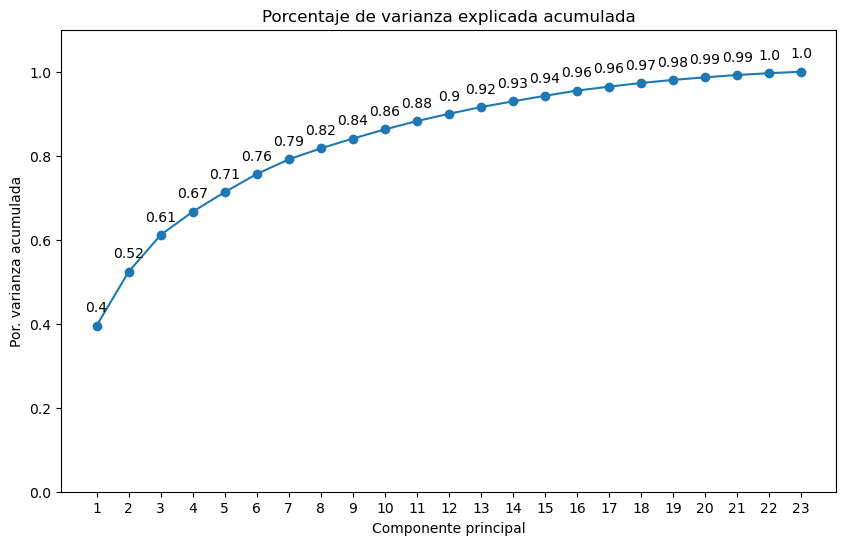

In [34]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(
    np.arange(len(df_scaled.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_scaled.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Me quedaría entre 5 y 6 Principal components

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [55]:
modelo_pca_2 = PCA(n_components=6)
modelo_pca_2.fit(df_scaled)

PCA(n_components=6)

In [61]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = modelo_pca_2.transform(df_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = [f'PC{n}' for n in range(1, 7)],
    index   = df_scaled.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6
ID,,,,,,
1001,0.843861,1.310724,-0.946091,-2.719258,-0.097522,0.934529
1002,-0.135939,1.019121,-0.129201,-2.323610,-0.448775,-0.398489
1003,3.570295,3.062321,-0.212945,-3.041321,0.373134,0.825341
1004,-1.928987,0.570223,-0.149185,-1.522555,-0.497052,0.044209
1005,-1.699886,0.566408,-0.159020,-1.577788,-0.765218,-0.096434


TypeError: only integer scalar arrays can be converted to a scalar index

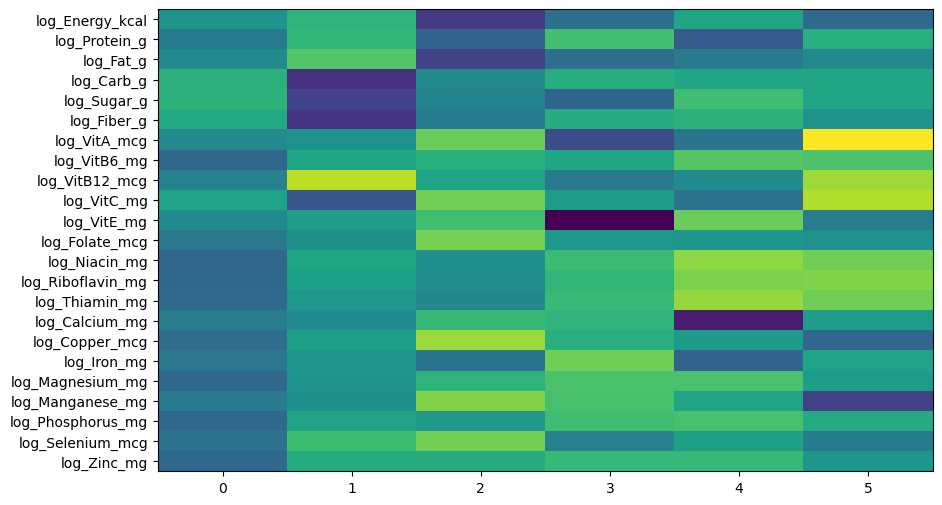

In [69]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
componentes = modelo_pca_2.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(df_scaled.columns), np.arange(modelo_pca_2.n_components_) + 1))
plt.grid(False)
plt.colorbar();

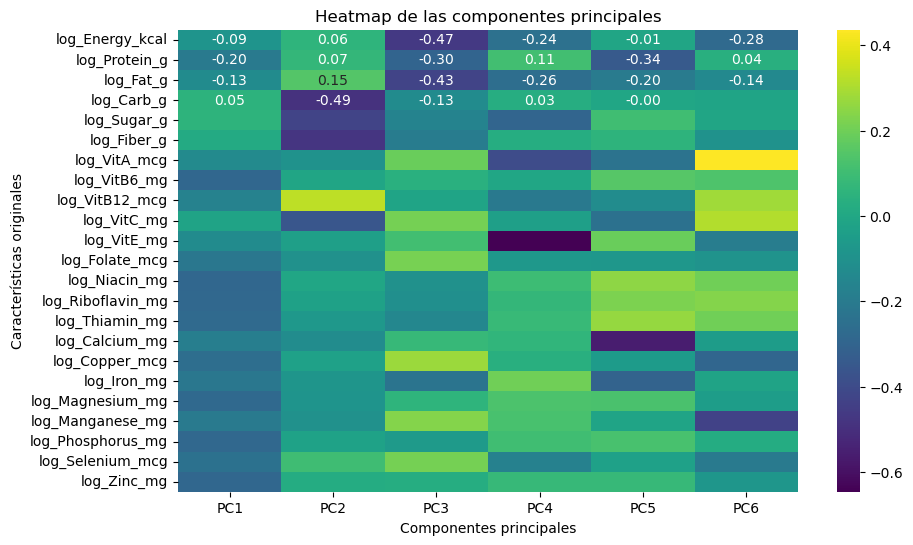

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
componentes = modelo_pca_2.components_

sns.heatmap(
    componentes.T,
    cmap='viridis',
    cbar=True,
    annot=True,
    fmt=".2f",
    yticklabels=df_scaled.columns,
    xticklabels=[f'PC{i+1}' for i in range(componentes.shape[0])],
    ax=ax
)

plt.title('Heatmap de las componentes principales')
plt.xlabel('Componentes principales')
plt.ylabel('Características originales')
plt.show()